<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Regression_stats_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

### Introduction
* Statstical tool to analyze the relationship between 2 variables.
* Regression models allow for exploration of relationship between a response variable and an explanatory variable.
* Can predict response variables given explanatory variables
* *Linear regression* is used when the reponse variable is continous
* *Logistic Regression* is used when the response variable is yes or no.
* *Statsmodels* is a library more optimized for insights
* *scikit-learn* is a library more optimized for prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tai=pd.read_csv('https://assets.datacamp.com/production/repositories/5857/datasets/4c29a50214b5b3232b2b99eee35cdde2f588dfac/taiwan_real_estate2.csv')

In [3]:
tai.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


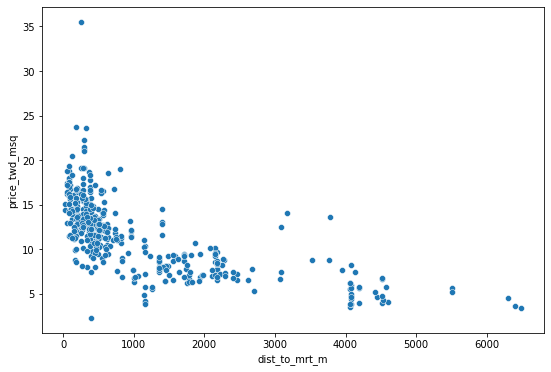

In [4]:
# understanding relation ship between price and dist to mrt
fig,ax=plt.subplots()
sns.scatterplot(x='dist_to_mrt_m',y='price_twd_msq',data=tai)
fig.set_size_inches([9,6])

### Fitting a regression
* Linear Regression defined by 2 parameters, the slope and the intercept
* Slope is constant for a line (change in y)/(change in x)


In [7]:
from statsmodels.formula.api import ols
model=ols('dist_to_mrt_m~price_twd_msq',data=tai)
model1=model.fit()
model1.params

Intercept        3456.999528
price_twd_msq    -206.506091
dtype: float64

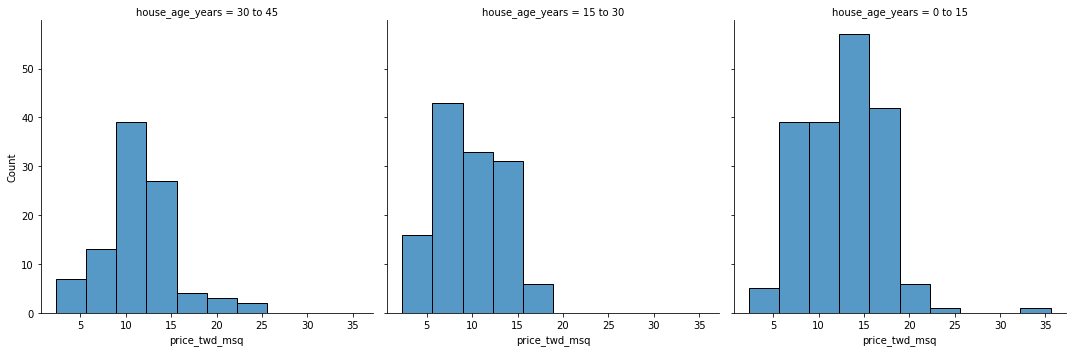

In [8]:
# Visualize the relationship between house age years and price
sns.displot(data=tai,x='price_twd_msq',col='house_age_years',bins=10)

In [9]:
# Fitting a model with categorical variable
model=ols('price_twd_msq~house_age_years+0',data=tai).fit()
model.params

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64

In [10]:
model=ols('price_twd_msq~dist_to_mrt_m',data=tai).fit()
model.params

Intercept        13.873352
dist_to_mrt_m    -0.002197
dtype: float64

In [11]:
tai['predictions']=model.fittedvalues

In [12]:
tai['resid']=model.resid

In [13]:
tai.sample(5)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,predictions,resid
387,2103.55500,3,15 to 30,7.745840,9.251226,-1.505386
354,1360.13900,1,0 to 15,9.107413,10.884728,-1.777315
384,4066.58700,0,15 to 30,3.903177,4.937871,-1.034694
286,90.45606,9,0 to 15,17.034796,13.674593,3.360203
304,1626.08300,3,15 to 30,8.895613,10.300372,-1.404759


In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.64e-56
Time:                        20:33:32   Log-Likelihood:                -1047.6
No. Observations:                 414   AIC:                             2099.
Df Residuals:                     412   BIC:                             2107.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.8734      0.197     70.258

### Regression to the mean
* Response_actual=fitted_value/prediction + residual
* This is equivalent to saying what can be expalained and what cannot be expalined.
* Extreme examples are due to radomness or noise
* Extreme examples do ot persist over time. This is the key intuition behind *Regression to the mean*.
### Transformations
* Sometimes the relationships between the data are not linear. In that case you might need to square or cube the explanatory variable before fitting the data.
* If the data is right skewed, lots of low values with few high outliers a sqrt transformation on both the explanatory and the response varibale could work and is commonly used. In this case prediction requires an extra step of squaring the prediction results


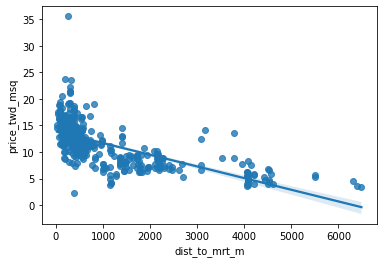

In [15]:
sns.regplot(data=tai,x='dist_to_mrt_m',y='price_twd_msq')

> The dist_to_mrt variable seem to be right skewed with a few outliers, houses that are very far from the MRT station. In this case it might be benefecial to transform the variable with a sqrt transformation

In [16]:
import numpy as np
tai['dist_sq']=np.sqrt(tai.dist_to_mrt_m)

In [17]:
model2=ols('price_twd_msq~dist_sq',data=tai).fit()


In [18]:
tai['predictions_sq']=model2.fittedvalues
tai['resid_sq']=model2.resid

In [19]:
tai.sample(5)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,predictions,resid,dist_sq,predictions_sq,resid_sq
117,4197.3490,0,0 to 15,3.933434,4.650548,-0.717114,64.786951,4.863968,-0.930533
246,389.8219,6,15 to 30,12.284418,13.016799,-0.732381,19.743908,13.099766,-0.815349
67,104.8101,5,0 to 15,17.186082,13.643053,3.543029,10.237680,14.837912,2.348170
145,451.2438,5,0 to 15,13.767020,12.881837,0.885183,21.242500,12.825760,0.941260
31,769.4034,7,15 to 30,7.564297,12.182747,-4.618451,27.738122,11.638081,-4.073785


In [20]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     469.7
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.55e-70
Time:                        20:33:49   Log-Likelihood:                -1015.3
No. Observations:                 414   AIC:                             2035.
Df Residuals:                     412   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7098      0.278     60.163      0.0

> In this case looks like the predictions after taking the sqrt are better, both by looking at the sample and the adjusted R squared in the model summary 0.53 vs 0.45

In [23]:
# Checking model fitsuainf RMSE. Lower values are better
print("Untransformed Model error",np.sqrt(model.mse_resid))
print("Transformed Model error",np.sqrt(model2.mse_resid))

Untransformed Model error 3.046456710939631
Transformed Model error 2.8175939245390764


> If the model is a good fit then the residuals are approximately normally distributed with mean 0. You can plot the residuals vs the fitted values. The trend line should be close to 0. Another way is a Q-Q plot.
X axis has theortical quantiles from a normal dist while on the y axis you have quantiles from your data. They should be equal and follow the y=x line for a perfect fit

-1.0984235528658553e-15

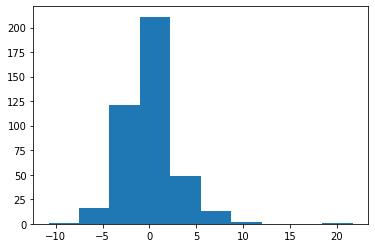

In [26]:
# Check fit method 1-Histogram of residuals
fig,ax=plt.subplots()
ax.hist(model2.resid)
model2.resid.mean()

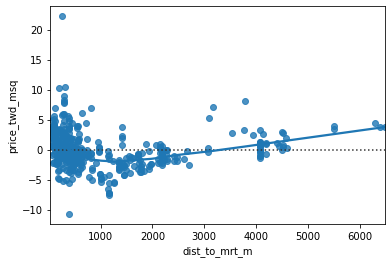

In [28]:
# Mehod 2-: resid plot
sns.residplot(x='dist_to_mrt_m',y='price_twd_msq',data=tai,lowess=True)

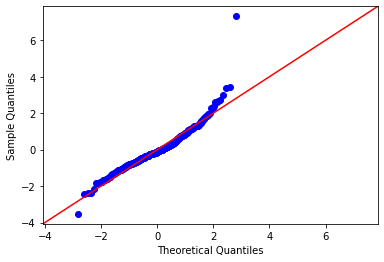

In [33]:
#method 3-: Q-Q plot
from statsmodels.api import qqplot
qqplot(data=model.resid,fit=True,line='45')
plt.show()

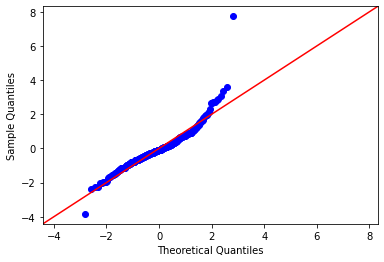

In [36]:
qqplot(data=model2.resid,fit=True,line='45')
plt.show()

### Outliers,Leverage and influence
* Outliers are highly unusual data points, too large or too small.
* **Leverage** is a measure of how extreme your explanatory variable values are.
* **Influence** is a measure of if you a leave the value out how much your model would change.


In [40]:
summary=model2.get_influence().summary_frame()
tai['leverage_2']=summary['hat_diag']
tai['influence']=summary['cooks_d']

In [42]:
tai.sort_values(by='influence',ascending=False)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,predictions,resid,dist_sq,predictions_sq,resid_sq,leverage_2,influence
270,252.5822,1,0 to 15,35.552194,13.318355,22.233839,15.892835,13.803908,21.748286,0.003849,1.155487e-01
148,3780.5900,0,15 to 30,13.645991,5.566290,8.079701,61.486503,5.467431,8.178560,0.012147,5.244008e-02
228,3171.3290,0,0 to 15,14.099849,6.905014,7.194834,56.314554,6.413085,7.686764,0.009332,3.538436e-02
220,186.5101,9,30 to 45,23.691377,13.463534,10.227842,13.656870,14.212738,9.478639,0.004401,2.512289e-02
113,393.2606,6,0 to 15,2.299546,13.009243,-10.709697,19.830799,13.083879,-10.784333,0.003095,2.281295e-02
...,...,...,...,...,...,...,...,...,...,...,...
298,4082.0150,0,15 to 30,5.052950,4.903971,0.148979,63.890649,5.027850,0.025100,0.013619,5.554280e-07
6,623.4731,7,30 to 45,12.193646,12.503399,-0.309753,24.969443,12.144315,0.049331,0.002530,3.896928e-07
265,815.9314,4,15 to 30,11.527988,12.080512,-0.552524,28.564513,11.486982,0.041006,0.002415,2.570474e-07
237,732.8528,0,0 to 15,11.800303,12.263060,-0.462757,27.071254,11.760013,0.040289,0.002435,2.501281e-07


In [43]:
tai

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,predictions,resid,dist_sq,predictions_sq,resid_sq,leverage_2,influence
0,84.87882,10,30 to 45,11.467474,13.686848,-2.219374,9.212970,15.025273,-3.557800,0.005764,4.648246e-03
1,306.59470,9,15 to 30,12.768533,13.199673,-0.431141,17.509846,13.508249,-0.739716,0.003506,1.216711e-04
2,561.98450,5,0 to 15,14.311649,12.638507,1.673142,23.706212,12.375287,1.936362,0.002625,6.231096e-04
3,561.98450,5,0 to 15,16.580938,12.638507,3.942431,23.706212,12.375287,4.205651,0.002625,2.939394e-03
4,390.56840,5,0 to 15,13.040847,13.015159,0.025689,19.762803,13.096311,-0.055464,0.003106,6.055123e-07
...,...,...,...,...,...,...,...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607,4.903971,-0.244364,63.890649,5.027850,-0.368243,0.013619,1.195505e-04
410,90.45606,9,0 to 15,15.128593,13.674593,1.454000,9.510839,14.970810,0.157783,0.005661,8.977830e-06
411,390.96960,7,15 to 30,12.284418,13.014277,-0.729859,19.772951,13.094456,-0.810038,0.003104,1.290873e-04
412,104.81010,5,0 to 15,15.885023,13.643053,2.241970,10.237680,14.837912,1.047111,0.005418,3.782254e-04


### Multi variable regression

In [51]:
from statsmodels.formula.api import ols
tai=pd.read_csv('https://assets.datacamp.com/production/repositories/5857/datasets/4c29a50214b5b3232b2b99eee35cdde2f588dfac/taiwan_real_estate2.csv')

In [53]:
tai['dist_sqrt']=np.sqrt(tai.dist_to_mrt_m)

In [67]:
model3=ols('price_twd_msq~dist_sqrt+n_convenience+house_age_years',data=tai).fit()

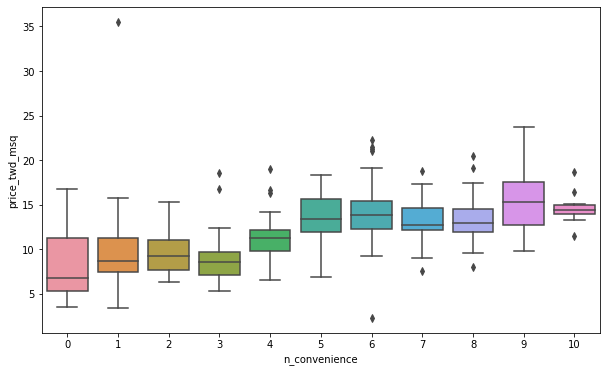

In [58]:
fig=plt.figure()
fig.set_size_inches([10,6])
sns.boxplot(x='n_convenience',y='price_twd_msq',data=tai)

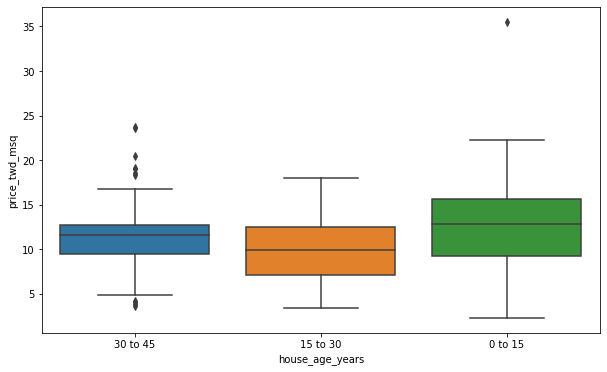

In [60]:
fig=plt.figure()
fig.set_size_inches([10,6])
sns.boxplot(x='house_age_years',y='price_twd_msq',data=tai)

In [69]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.68e-75
Time:                        21:42:06   Log-Likelihood:                -993.67
No. Observations:                 414   AIC:                             1997.
Df Residuals:                     409   BIC:                             2017.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [76]:
np.sqrt(model3.mse_resid)/tai.price_twd_msq.mean()

0.2335613656790428

In [72]:
tai['predictions']=model3.fittedvalues

In [73]:
tai['resid']=model3.resid

In [74]:
tai.sample(5)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,dist_sqrt,predictions,resid
64,995.7554,0,15 to 30,7.655068,31.555592,9.456625,-1.801557
382,3529.5640,0,15 to 30,8.865356,59.410134,5.331323,3.534033
317,752.7669,2,15 to 30,11.346445,27.436598,10.581986,0.764459
383,506.1144,4,15 to 30,12.193646,22.496986,11.828882,0.364764
77,2185.1280,3,15 to 30,7.745840,46.745353,7.979994,-0.234154


### Logistic Regression
* if the response variable is categorical (0,1) then we use logistic regression.
* The model predictions given by the equation can be thought of as probabilities. If you just use a standard ols model it will give you probabilities greater than 1 or less than 0. Therefore a special type of model object has to be used called a logistic model which uses an s shaped curve